# CS 240 Homework-3
### Ahmet Öztemiz - 213010595

In [1]:
import nsfg
import thinkstats2
import thinkplot
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
resp = nsfg.ReadFemResp(dct_file='2002FemResp.dct', dat_file='2002FemResp.dat.gz', nrows=None)

## Question 1

### Q.1.1

In [3]:
timesmar_df = resp["timesmar"].dropna(how='any')
jintendn_df = resp["jintendn"].dropna(how='any')

mean_time, std_time = timesmar_df.mean(), timesmar_df.std()
mean_jin, std_jin = jintendn_df.mean(), jintendn_df.std()

print "mean for timesmar column:", mean_time, "standard deviation for timesmar column:", std_time
print "mean for jintendn column:", mean_jin, "standard deviation for jintendn column:", std_jin


mean for timesmar column: 1.38705768299 standard deviation for timesmar column: 4.29711302325
mean for jintendn column: 2.70525568182 standard deviation for jintendn column: 9.71010805146


### Q.1.2

In [4]:
pdf_time = thinkstats2.NormalPdf(mean_time, std_time)
pdf_time.Density(mean_time + std_time)

0.056310067529003929

In [5]:
pdf_jin = thinkstats2.NormalPdf(mean_jin, std_jin)
pdf_jin.Density(mean_jin+ std_jin)

0.024919467758428907

In [6]:
pmf_time = pdf_time.MakePmf()
pmf_jin = pdf_jin.MakePmf()

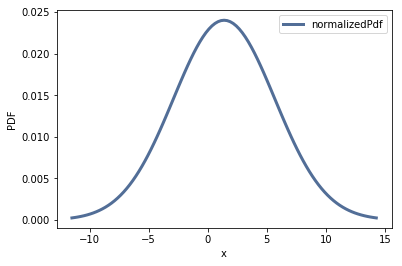

In [7]:
thinkplot.Pdf(pmf_time, label='normalizedPdf')
thinkplot.Config(xlabel='x', ylabel='PDF')

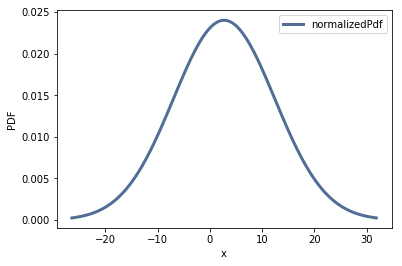

In [8]:
thinkplot.Pdf(pmf_jin, label='normalizedPdf')
thinkplot.Config(xlabel='x', ylabel='PDF')

### Q.1.3

In the first question, i am filtering our specific columns in datafram such as 'timesmar' and 'jintendn' to find exact mean and standard deviation values. After that, i am plotting normalized probability density function values depending upon cleared columns with smooth curve. It shows continuous random variables. Our both column have similar probablity density for 'timesmar' 0.056310067529003929 and for 'jintendn' 0.024919467758428907. We can see that which column has higher probability range and also, 'jintendn' columns has extensive range comparing with 'timesmar'. Normalized PDF avoid us repeated rows and not efficient values because these values could affect our result negatively.

## Question 2

### Q.1.2

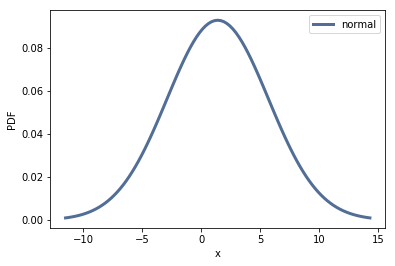

In [9]:
thinkplot.Pdf(pdf_time, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

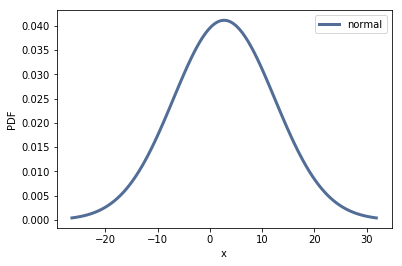

In [10]:
thinkplot.Pdf(pdf_jin, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

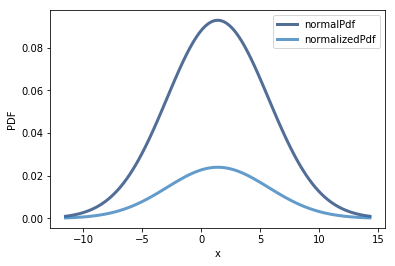

In [11]:
thinkplot.Pdf(pdf_time, label='normalPdf')
thinkplot.Config(xlabel='x', ylabel='PDF')

thinkplot.Pdf(pmf_time, label='normalizedPdf')
thinkplot.Config(xlabel='x', ylabel='PDF')

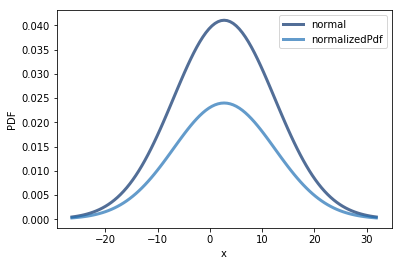

In [12]:
thinkplot.Pdf(pdf_jin, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

thinkplot.Pdf(pmf_jin, label='normalizedPdf')
thinkplot.Config(xlabel='x', ylabel='PDF')

### Q.2.2

In [13]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [14]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    sum_list = [(x - mean)**k for x in xs]
    return sum(sum_list) / len(sum_list)

In [15]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [16]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

print "Skewness for timesmar column:", Skewness(timesmar_df),\
        "\nSkewness for jinyendn column:", Skewness(jintendn_df)

Skewness for timesmar column: 22.2193072207 
Skewness for jinyendn column: 9.68691405793


In [17]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [18]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

print "PearsonMedianSkewness for timesmar column:", PearsonMedianSkewness(timesmar_df),\
        "\nPearsonMedianSkewness for jinyendn column:", PearsonMedianSkewness(jintendn_df)

PearsonMedianSkewness for timesmar column: 0.27025442021 
PearsonMedianSkewness for jinyendn column: 0.527036842972


### Q.2.3

In the second question, i plotted probability density funtion without normalization for both column separately. Also, i plotted normalized PDF and normal PDF in the same plot for each column to compare our result. There is obvious change between normalized and without normalized probability density function. On the other hand, i found skewnesses and Pearson median skewness values for 'timesmar' and 'jintendn' variables. These values answers distribution of our column's skewness in the graph. If our result will be negative then our line goes to left side but positive values causes to line skewed right side of the plot. PearsonMedianSkewness results show that 'timesmar' and 'jintendn' are slightly skewed to the right.


Skewness for timesmar column: 22.2193072207 
Skewness for jinyendn column: 9.68691405793
PearsonMedianSkewness for timesmar column: 0.27025442021 
PearsonMedianSkewness for jinyendn column: 0.527036842972


## Question 3

### Q.3.1

In [19]:
def SampleRows(df, nrows, replace=False):
    # replace = same row could be chosen more than one or not
    indices = np.random.choice(df.index, nrows, replace=replace)
    print(indices)
    sample = df.loc[indices]
    return sample

sample = SampleRows(resp, 5000)
sample_timesmar, sample_jintendn = sample.timesmar, sample.jintendn

[3393 3452 4024 ..., 2629 5903 5932]


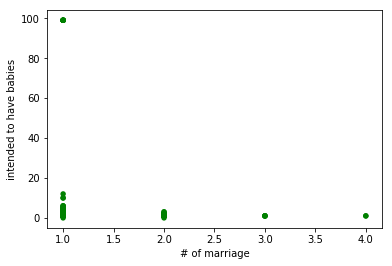

In [20]:
thinkplot.Scatter(sample_timesmar, sample_jintendn, alpha=1,color='Green')
thinkplot.Config(xlabel='# of marriage',
                 ylabel='intended to have babies',
                 legend=False)

In [21]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [22]:
timesmar_t = Jitter(sample_timesmar, 1.4)
jintendn_t = Jitter(sample_jintendn, 0.5)


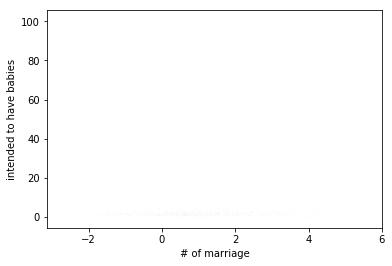

In [23]:
thinkplot.Scatter(timesmar_t, jintendn_t, alpha=0.01, s=2,color='black')
thinkplot.Config(xlabel='# of marriage',
                 ylabel='intended to have babies',
                 legend=False)

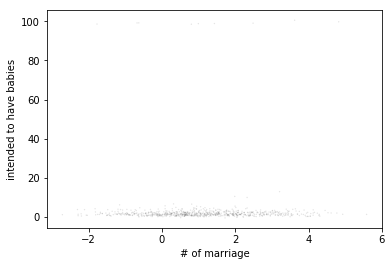

In [24]:
thinkplot.Scatter(timesmar_t, jintendn_t, alpha=0.1, s=2,color='black')
thinkplot.Config(xlabel='# of marriage',
                 ylabel='intended to have babies',
                 legend=False)

### Q.3.2

In [25]:
cleaned_df = resp.dropna(subset=["timesmar", "jintendn"])

In [26]:
bins = np.arange(-1, 5, 1)
print bins
indices = np.digitize(cleaned_df.timesmar, bins)
print(indices)
groups = cleaned_df.groupby(indices)

[-1  0  1  2  3  4]
[3 3 4 ..., 3 3 4]


In [27]:
mean_timesmar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

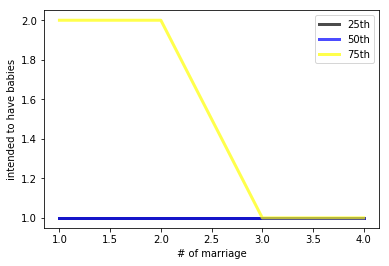

In [28]:
colors = ["black","blue","yellow"]
percent = [25, 50, 75]
for i in range(len(percent)):
    jintendn_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_timesmar, jintendn_percentiles, label=label,color=colors[i])
    
thinkplot.Config(xlabel='# of marriage',
                 ylabel='intended to have babies',
                 legend=True)

### Q.3.3

In the first scatter plot, we can see that data fall in obvious columns about density values related to specific columns but our dataframe's values categorized so we could not understand everything from these plots because these plots shows density of symbolic numbers. Second scatter plot shows the location and shape of the distribution most accurately but we used very small value for alpha variable so we could not see our result easily in the plot. When we increase the alpha value as 0.1, there will be clear result about our data which shown thir plot. Also, this plot shows that categoric values in our data frame for both columns which are 'timesmar' and 'jintendn'. In the 'jintendn' column, 99 means that Do not have any information so it is categorical value but it is affect our plot so we could not easily analyze our plot. In the last plot, we can observe percentile of both column's values together. Firstly, we can get information about relationship between 'timesmar' and 'jintendn' variables is to divide the dataset into groups using one variable, and then plot percentiles of the other variable.

## Question 4

In [29]:
pearson_crr = stats.pearsonr(cleaned_df.timesmar, cleaned_df.jintendn)
print "Pearson Correlation Result:", pearson_crr[:]

Pearson Correlation Result: (-0.036523466523859391, 0.23171606728546632)


In [30]:
spearman_crr = stats.spearmanr(cleaned_df.timesmar, cleaned_df.jintendn)
print "Spearman Correlation Result:", spearman_crr[:]

Spearman Correlation Result: (-0.083377477903482558, 0.0062565986838944319)


### Q.4.2

### Difference Bewteen Pearson Correlation and Spearman Correlation

The pearson correlation measures the linear relationship and also spearman correlation measures monotonic relationship between two continuous variables. The difference between the Pearson correlation and the Spearman correlation is that the Pearson is most appropriate for measurements taken from an interval scale, while the Spearman is more appropriate for measurements taken from ordinal scales. Examples of interval scales include "temperature in Farenheit" and "length in inches", in which the individual units (1 deg F, 1 in) are meaningful. Things like "satisfaction scores" tend to of the ordinal type since while it is clear that "5 happiness" is happier than "3 happiness", it is not clear whether you could give a meaningful interpretation of "1 unit of happiness". But when you add up many measurements of the ordinal type, which is what you have in your case, you end up with a measurement which is really neither ordinal nor interval, and is difficult to interpret. In the pearson correlation result, we can notice that timesmar has negative value and jintendn has positive value and also, we observe same difference in the spearman correlation result for both column. Therefore, we can claim that there is no linear relation ship between 'jintendn' and 'timesmar' variables.
<ul>
<li>When we find negative pearson correlation as -0.036523466523859391 then our result indicates that timesmar variable increases and jintendn variable decreases</li>

<li>When pearson correlation p-value will be equal to 0.23171606728546632 then it shows that our result larger than alpha value which is 0.05. Therefore, it has not significant correlation.</li>

<li>When we find negative pearson correlation as -0.083377477903482558 then our result indicates that timesmar variable increases and jintendn variable decreases.</li>

<li>When pearson correlation p-value will be equal to 0.0062565986838944319 then it shows that our result smaller than alpha value which is 0.05. Therefore, it has significant correlation.</li>
</ul>

### Q.4.3

We used some two columns in our resp data frame but these columns have categorical values that hard to understand results from graphs so we discarded NaN and inapplicable values in our dataframe but still hard to understand some of the graphs because of the categorical values. Our first column represents number of marriage for respondents and second columns shows repsondent's intention to have a baby. However, we found probability and density of these columns and percentile values. Also, we compared two column with scatter and percentile plots. Lastly, we found correlation between them with Pearson Correlation and Spearman Correlation.